Explatory data analysis from the Feature Engeineering Made Easy book.
Using the Pima Indians dataset.

This notebook explores basic EDA as well as dealing with missing data, normalization and application through the use of Pipelinesfor cross-validation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

/home/hayden/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/hayden/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/hayden/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/hayden/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/hayden/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indi

In [2]:
# load the dataset
pima = pd.read_csv("pima-indians-diabetes.csv")
pima.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


The column namaes are missing. Will manually add the colum names

In [34]:
cols = ['times_pregnant', 'plasma_glucose_concentration',
'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi',
'pedigree_function', 'age', 'onset_diabetes']
pima = pd.read_csv("pima-indians-diabetes.csv", names=cols)
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   times_pregnant                768 non-null    int64  
 1   plasma_glucose_concentration  768 non-null    int64  
 2   diastolic_blood_pressure      768 non-null    int64  
 3   triceps_thickness             768 non-null    int64  
 4   serum_insulin                 768 non-null    int64  
 5   bmi                           768 non-null    float64
 6   pedigree_function             768 non-null    float64
 7   age                           768 non-null    int64  
 8   onset_diabetes                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The aim here is to determine if we can predict the onset of diabetes from this dataet. Obtain the null accuracy

In [32]:
pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, dtype: float64

Use histogram to view patterns

In [74]:
# convert to wide format
pima_long = pd.melt(pima, id_vars=cols[-1], value_vars=cols[0:-1])
pima_long["onset_diabetes"] = pima_long["onset_diabetes"].astype(str) 
pima_long.head()

,onset_diabetes,variable,value
0,1,times_pregnant,6.0
1,0,times_pregnant,1.0
2,1,times_pregnant,8.0
3,0,times_pregnant,1.0
4,1,times_pregnant,0.0


In [37]:
# plotning: ggplot in Python

from plotnine import *

/home/hayden/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/hayden/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/hayden/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/hayden/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


/home/hayden/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 116'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


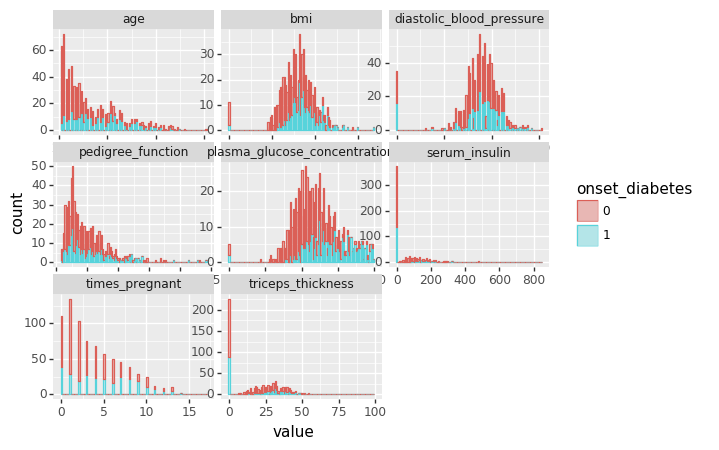

<ggplot: (8781280520333)>

In [75]:
ggplot(pima_long, aes(x="value", color="onset_diabetes",fill = "onset_diabetes"))+ geom_histogram(alpha=0.4) + facet_wrap("variable",scales="free")

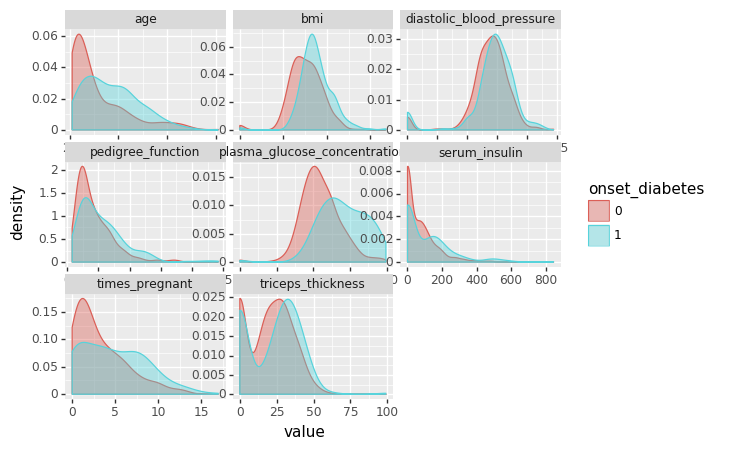

<ggplot: (8781290294845)>

In [76]:
ggplot(pima_long, aes(x="value", color="onset_diabetes",fill = "onset_diabetes"))+ geom_density(alpha=0.4) + facet_wrap("variable",scales="free")

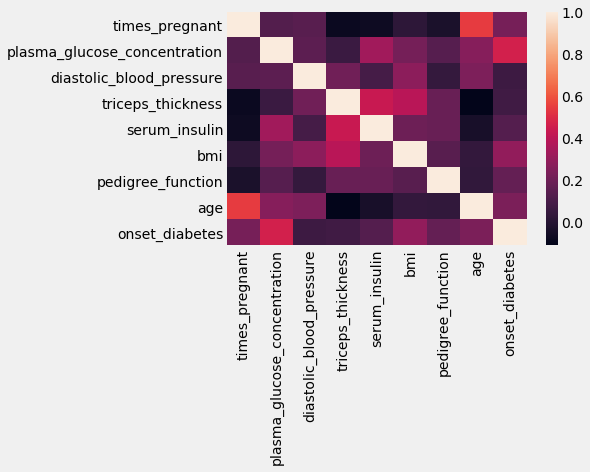

In [77]:
# correlation matrix
sns.heatmap(pima.corr())

In [79]:
pima.corr()['onset_diabetes']

times_pregnant                  0.221898
plasma_glucose_concentration    0.466581
diastolic_blood_pressure        0.065068
triceps_thickness               0.074752
serum_insulin                   0.130548
bmi                             0.292695
pedigree_function               0.173844
age                             0.238356
onset_diabetes                  1.000000
Name: onset_diabetes, dtype: float64

there seems to be a week correlation between plasma_glucose_concentration  and onset_diabetes

In [80]:
# look for missing values
pima.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [81]:
# dscriptive stats
pima.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


there are a few features with the min value of 0. for instance BMI, a vlue of 0 is not possible, but for times_pregnant it is a possible value. It is possile that 0 is used to encode missing values in a number of features: bmi, plasma_glucose_concentration, diastolic_blood_pressure, triceps_thickness, serum_insulin.
So there are indeed missing values, which is a different story from using the isnull method.

**This is a very important lesson. Just because there is no na values does not mean data is missing**

In [82]:
#dealing with missing data

#1. first replace the zero values with None


zero_cols = ['bmi', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin']
for col in zero_cols:
    pima[col].replace([0], [None], inplace=True)

In [83]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [95]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,None,33.6,0.627,50,1
1,1,85,66,29,None,26.6,0.351,31,0
2,8,183,64,None,None,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


There are a lot of missing data. There are two ways to deal with missing data: 
    1. remove all rows with na: pma_dropped = pima.dropna() 
    2. imute i.e. fill in the missing data, most commonly the mean value of the column

In [86]:
# impute using the Imputer class
from sklearn.impute import SimpleImputer

In [90]:
imputer = SimpleImputer(np.nan, strategy='mean')

In [91]:
pima_imputed = imputer.fit_transform(pima)

In [92]:
type(pima_imputed)

numpy.ndarray

In [94]:
# recast as dataframe
pima_imputed = pd.DataFrame(pima_imputed, columns=cols)
pima_imputed.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [97]:
pima_imputed.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [100]:
# simple model with KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X_imputed = pima_imputed.drop('onset_diabetes', axis=1)
y_imputed = pima_imputed['onset_diabetes']

knn_params = {'n_neighbors':[1,2,3,4,5,6,7,8,9]}
knn = KNeighborsClassifier() # instantiate a KNN model
grid = GridSearchCV(knn, knn_params)
grid.fit(X_imputed, y_imputed)

print(grid.best_score_, grid.best_params_)

0.746176046176046 {'n_neighbors': 8}


The above method is flawed. note the imputed data were used for the entire training, and thus the test set in the CV steps wuld not be indpendedent. In pythn there is the Pipeline function that an allow us to: 1. compute the mean value from the train split and ;2 transorm the test and train sets

In [103]:
from sklearn.pipeline import Pipeline

knn_params = {'classify__n_neighbors':[1,2,3,4,5,6,7,8,9]}
knn = KNeighborsClassifier() # instantiate a KNN model

#imputer = SimpleImputer(np.nan, strategy='mean')
mean_impute = Pipeline([('imputer', SimpleImputer(np.nan, strategy='mean')),('classify',knn)])

X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7487734487734488 {'classify__n_neighbors': 8}


In [104]:
from sklearn.ensemble import RandomForestClassifier
rf_params = {'classify__n_estimators':[100, 200, 300, 500]}
rf = RandomForestClassifier() # instantiate a rf model

#imputer = SimpleImputer(np.nan, strategy='mean')
mean_impute = Pipeline([('imputer', SimpleImputer(np.nan, strategy='mean')),('classify',rf)])

X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute, rf_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

/home/hayden/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


0.770902300314065 {'classify__n_estimators': 100}


Scale the data. There are three main scalers in sklearn:
1. Z-score standardization: from sklearn.preprocessing import StandardScaler
2. min-max scaler: from sklearn.preprocessing import MinMaxScaler
3. row normalization: from sklearn.preprocessing import Normalizer
they are used in the same manner:
1. fit the scaler: scaler = StandardScaler().fit(X_train)
2. transform the data: X_train_scale = scaler.transform(X_train); X_test_scale = scaler.transform(X_test)

below the StandardScaler will be incorporated into the pipeline to determine the best parameters.

In [109]:
from sklearn.preprocessing import StandardScaler

knn_params = {'imputer__strategy':['mean', 'median'],
              'classify__n_neighbors':[1,2,3,4,5,6,7,8,9]}
knn = KNeighborsClassifier() # instantiate a KNN model

pima_pipeline = Pipeline([('imputer', SimpleImputer()), ('standardize',StandardScaler()), ('classify', knn)])

X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(pima_pipeline, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7539173245055598 {'classify__n_neighbors': 7, 'imputer__strategy': 'mean'}


scaling the data improved the results from 0.749 to 0.754. What about with random forest/

In [108]:
rf_params = {'imputer__strategy':['mean', 'median'],
              'classify__n_estimators':[100, 200, 300, 500]}
rf = RandomForestClassifier() # instantiate a rf model

pima_pipeline = Pipeline([('imputer', SimpleImputer()), ('standardize',StandardScaler()), ('classify', rf)])

X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(pima_pipeline, rf_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7669807316866141 {'classify__n_estimators': 200, 'imputer__strategy': 'mean'}


worse that without scaling: 0.771 without vs 0.767 with scaling.